# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output file
cities_csv_path = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = f"https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord'] ['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | freetown
Processing Record 8 of Set 1 | bargaal
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | amga
Processing Record 14 of Set 1 | rikaze
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | inarajan village
Processing Record 17 of Set 1 | sao vicente
Processing Record 18 of Set 1 | iguape
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of Set 1 | p

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.24,82,100,6.86,PN,1707170690
1,anadyr,64.7500,177.4833,-22.72,77,100,7.00,RU,1707170983
2,port-aux-francais,-49.3500,70.2167,5.94,82,99,12.42,TF,1707170983
3,whitehorse,60.7161,-135.0538,-11.06,95,100,1.22,CA,1707170983
4,vilyuchinsk,52.9306,158.4028,-9.85,76,78,3.78,RU,1707170983


In [6]:
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.24,82,100,6.86,PN,1707170690
1,anadyr,64.7500,177.4833,-22.72,77,100,7.00,RU,1707170983
2,port-aux-francais,-49.3500,70.2167,5.94,82,99,12.42,TF,1707170983
3,whitehorse,60.7161,-135.0538,-11.06,95,100,1.22,CA,1707170983
4,vilyuchinsk,52.9306,158.4028,-9.85,76,78,3.78,RU,1707170983


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

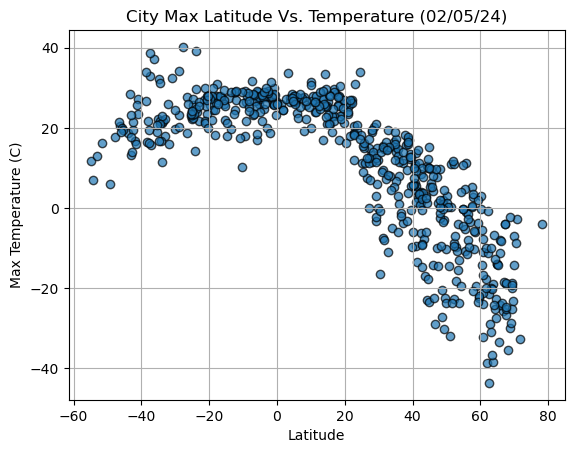

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', marker='o', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Max Latitude Vs. Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

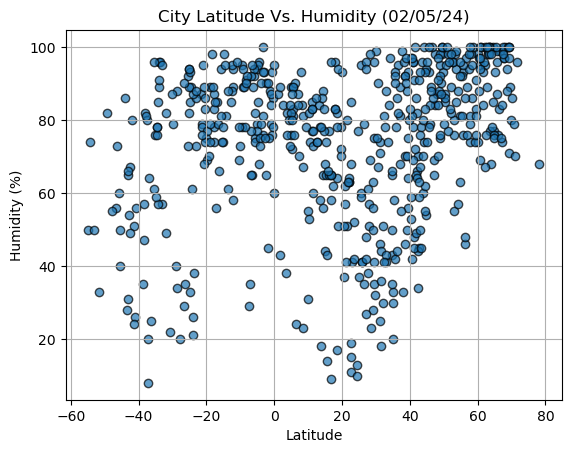

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', marker='o', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude Vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

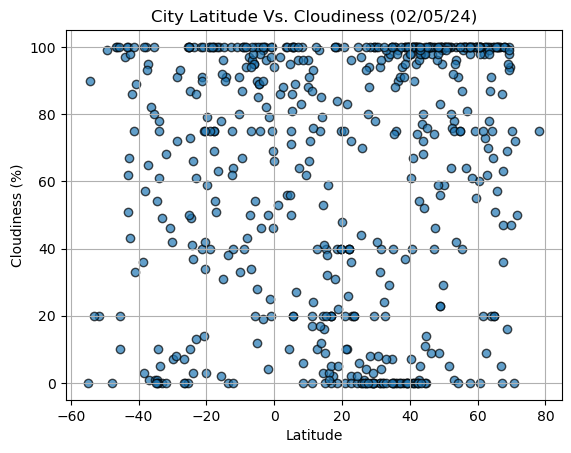

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', marker='o', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude Vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

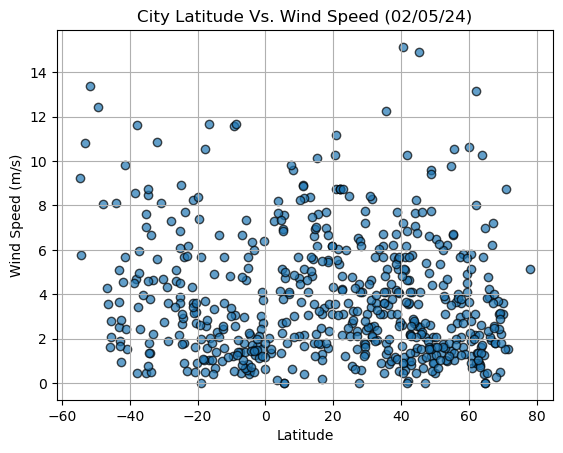

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', marker='o', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, xlabel, ylabel, text_position):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create scatter plot
    plt.scatter(x, y)
    
    # Create regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='red')
    print(f'The r-value is: {r_value**2}')

    # Create line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Add line equation to plot
    plt.annotate(line_eq, text_position, fontsize=14, color='red')
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anadyr,64.7500,177.4833,-22.72,77,100,7.00,RU,1707170983
3,whitehorse,60.7161,-135.0538,-11.06,95,100,1.22,CA,1707170983
4,vilyuchinsk,52.9306,158.4028,-9.85,76,78,3.78,RU,1707170983
5,ilulissat,69.2167,-51.1000,-19.99,71,100,0.51,GL,1707170984
6,freetown,8.4840,-13.2299,25.72,81,0,3.02,SL,1707170984


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.24,82,100,6.86,PN,1707170690
2,port-aux-francais,-49.3500,70.2167,5.94,82,99,12.42,TF,1707170983
8,waitangi,-43.9535,-176.5597,18.79,86,97,8.12,NZ,1707170984
16,sao vicente,-23.9631,-46.3919,29.59,26,37,0.89,BR,1707170986
17,iguape,-24.7081,-47.5553,25.77,85,73,2.65,BR,1707170987


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7306127164034941


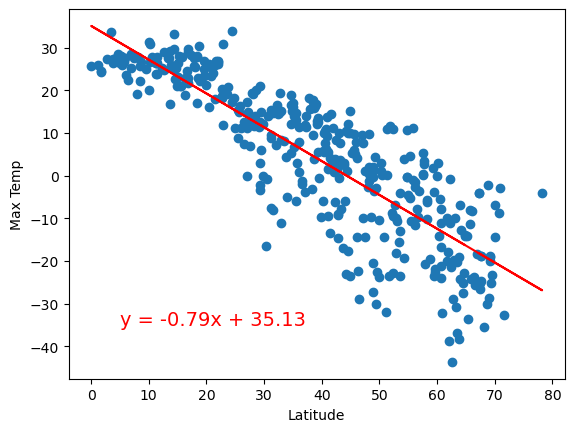

In [16]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (5, -35))


The r-value is: 0.17798081811897387


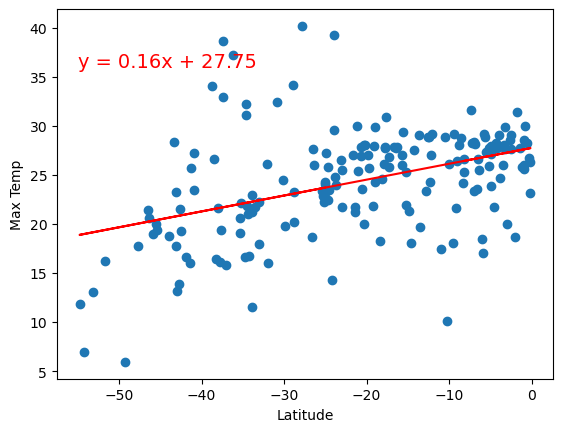

In [17]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (-55, 36))

**Discussion about the linear relationship:** The r-value of 0.73 indicates that there is a strong negative correlation between latitude and maximum temperature in the northern hemisphere. And the r-value of 0.177 indicates that there is a moderate correlation between latitude and maximum temperature in the southern hemisphere. The maximum temperature increases as get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15202897439541202


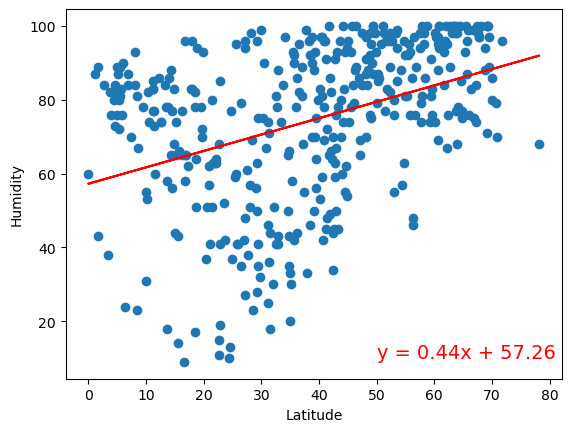

In [18]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (50, 10))


The r-value is: 0.19821367538137322


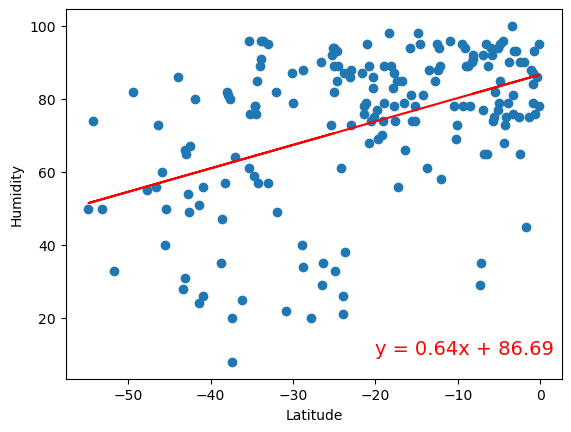

In [19]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-20, 10))

**Discussion about the linear relationship:** The r-value in the northern hemisphere and the southern hemisphere indicates there are weak positive correlation between latitude and humidity. . The scatterplots show that the data are too scattered to establish a reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06553709926072275


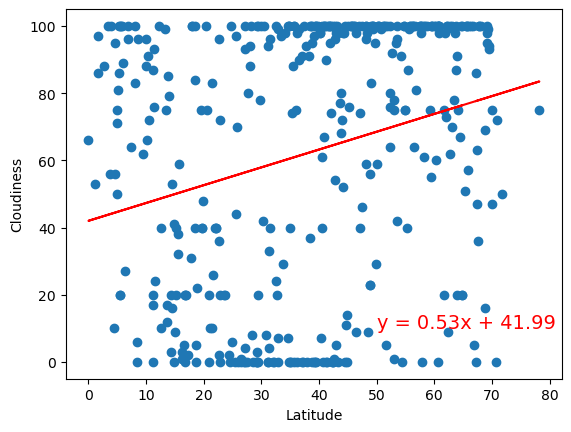

In [20]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (50, 10))

The r-value is: 0.04511809670152392


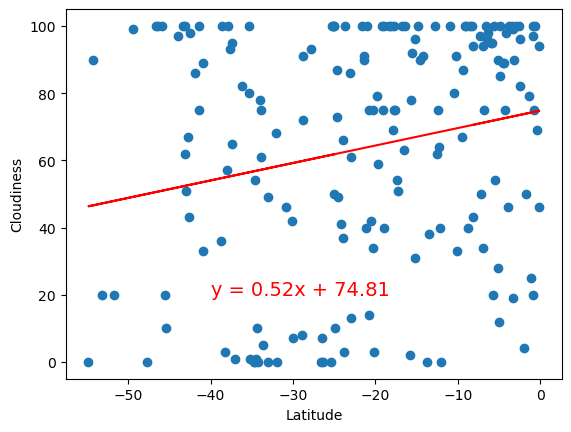

In [25]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-40, 20))

**Discussion about the linear relationship:** According to the available data, there is virtually limited connection between latitude and cloud cover. The linear equation for each hemisphere shows a positive correlation, which means that proximity to the equator does not affect cloud cover. The scatter points show that the data is too scattered to establish a reliable correlation between latitude and cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030677973906485023


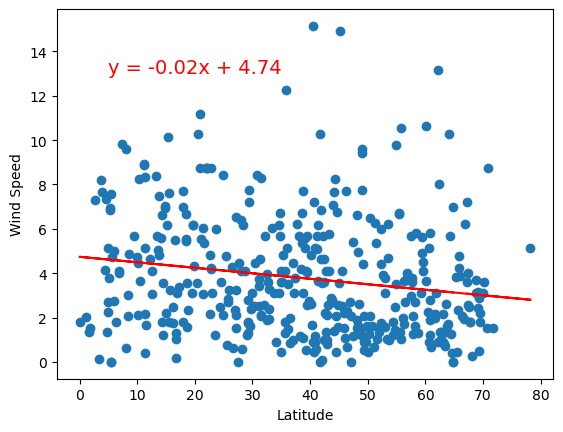

In [24]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (5, 13))

The r-value is: 0.12520251067107607


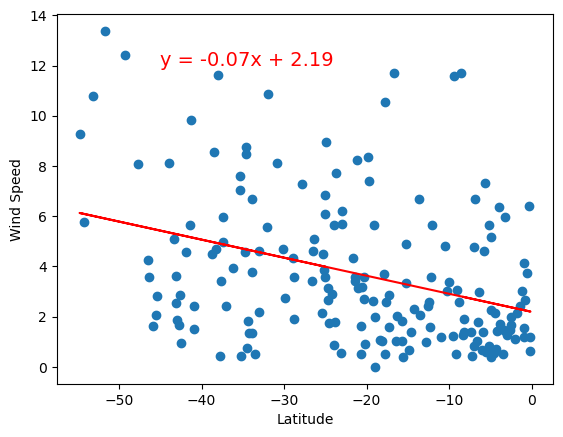

In [27]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-45, 12))

**Discussion about the linear relationship:** Based on the available data, there is little to no relationship between latitude and wind speed. The r-value is low for both hemispheres, and the scatterplots show that the data are too scattered to establish a reliable correlation between latitude and wind speed.